In [17]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# Libraries


In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff


import missingno as msno



import re
import string

In [122]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [83]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mznha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mznha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mznha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mznha\AppData\Roaming\nltk_data...


True

In [77]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn import metrics
#from sklearn.metrics import plot_roc_curve
#import scikitplot as skplt


from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# import pickle

In [48]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
train = pd.read_csv('train_tweets.csv')
test = pd.read_csv('test_tweets.csv')

In [3]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


## Duplicates

In [9]:
train.duplicated().sum()


0

In [10]:
test.duplicated().sum()

0

## Null values

In [11]:
train.isna().mean()*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

33.27 % missing location values

In [12]:
test.isna().mean()*100

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

33.86 %  missing location values

<AxesSubplot:>

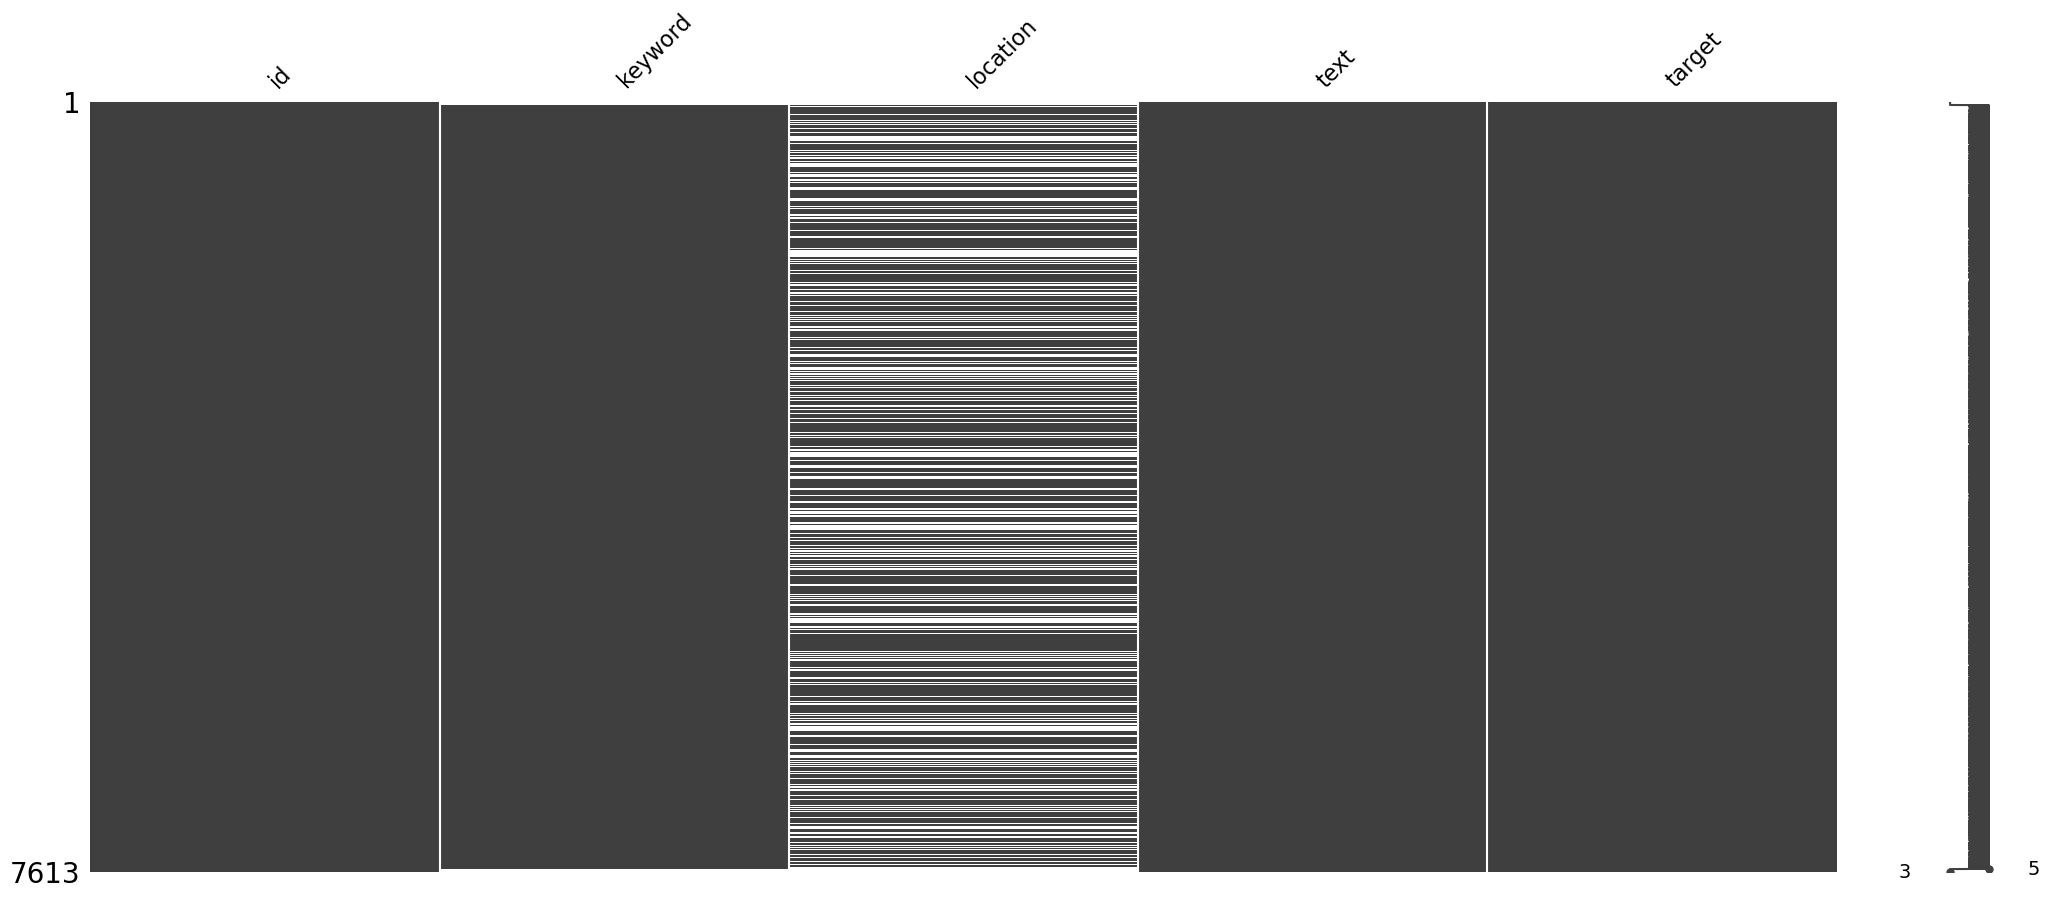

In [20]:

msno.matrix(train)

<AxesSubplot:>

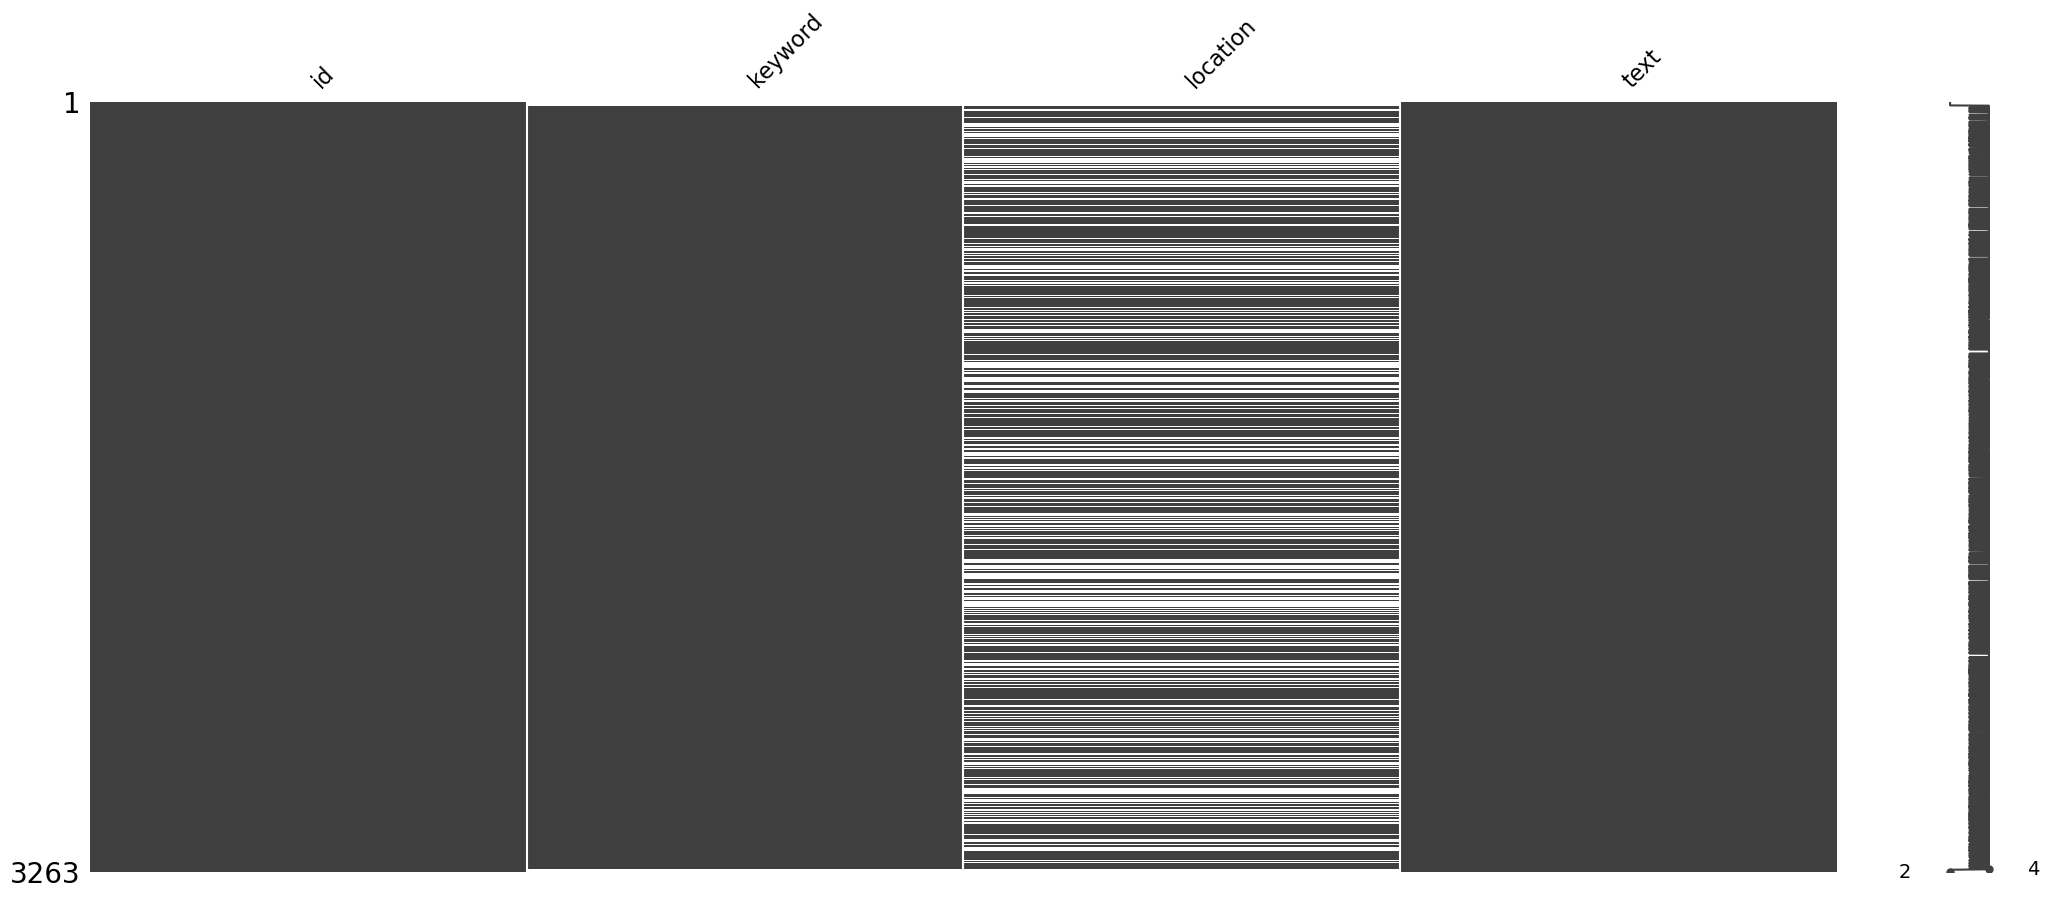

In [21]:
msno.matrix(test)

In [22]:

# shuffle and reindex
for df in [train, test]:    
    df = df.sample(frac = 1).reset_index(drop = True)

# print basic properties
print(f"Training Data has {train.shape[0]} rows and {train.shape[1]} columns: ({list(train.columns)})")
print(f"Testing Data has {test.shape[0]} rows and {test.shape[1]} columns: ({list(test.columns)})")

Training Data has 7613 rows and 5 columns: (['id', 'keyword', 'location', 'text', 'target'])
Testing Data has 3263 rows and 4 columns: (['id', 'keyword', 'location', 'text'])


# EDA

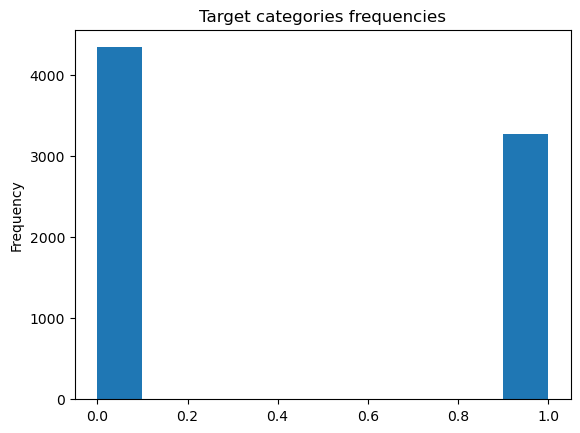

In [23]:
# plot categories frequencies
train['target'].plot(kind = 'hist', title = 'Target categories frequencies')
plt.show()

In [24]:
# fix mis-classified targets
error_ids = [328, 443, 513, 2619, 3640, 3900, 4342, 5781, 6552, 6554, 6570, 6701, 6702, 6729, 6861, 7226]
train.loc[error_ids, 'target'] = 0

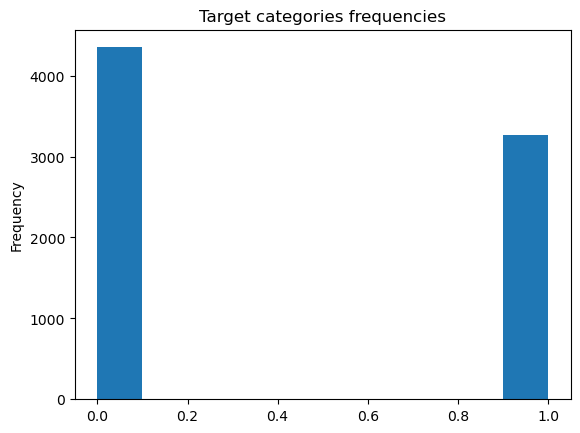

In [25]:
train['target'].plot(kind = 'hist', title = 'Target categories frequencies')
plt.show()

In [26]:
# count null entries
null_entries = train.loc[train['keyword'].isnull()]
null_entries_count = len(null_entries)
print(f'Number of missing entries: {null_entries_count} (<{round(null_entries_count / train.shape[0] * 100)}%)')

# count unique entries
unique_locations = train['keyword'].unique()
unique_locations_count = len(unique_locations)
print(f'Number of unique keywords: {unique_locations_count} (~{round(unique_locations_count/train.shape[0]*100)}%)')

Number of missing entries: 61 (<1%)
Number of unique keywords: 222 (~3%)


In [41]:


def remove_URL(text):
  # http:... / https:... / www... 
    url = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(url,'',text)

In [42]:

def remove_at_tag(text):
  at_tag = re.compile(r'@\S+')
  return re.sub(at_tag, '', text)


In [37]:

train.text[train['target'] == 1]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3263, dtype: object

In [45]:

train['clean'] = train['text'].apply(lambda x: remove_at_tag(x))
train['clean'] = train['text'].apply(lambda x: remove_URL(x))

In [46]:

train.clean.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: clean, dtype: object

In [50]:

text_wc0 = " ".join(tweet for tweet in train.clean[train['target'] == 0])

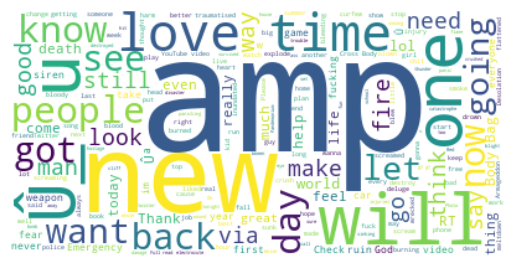

In [51]:
stop_words = set(STOPWORDS)

# Generate a word cloud image
wordcloud0 = WordCloud(stopwords=stop_words, background_color="white").generate(text_wc0)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis("off")
plt.show()

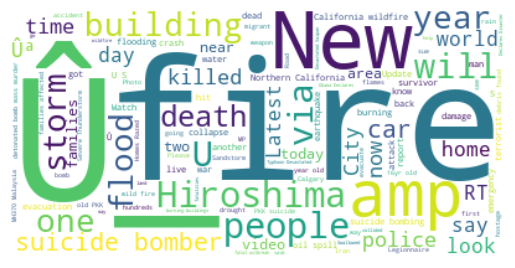

In [54]:

text_wc1 = " ".join(tweet for tweet in train.clean[train['target'] == 1])

# Generate a word cloud image
wordcloud1 = WordCloud(stopwords=stop_words, background_color="white").generate(text_wc1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
train['tweet_len'] = train.text.apply(len)
train.head()

,id,keyword,location,text,target,clean,tweet_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,88


Text(0.5, 0, 'Tweets Length')

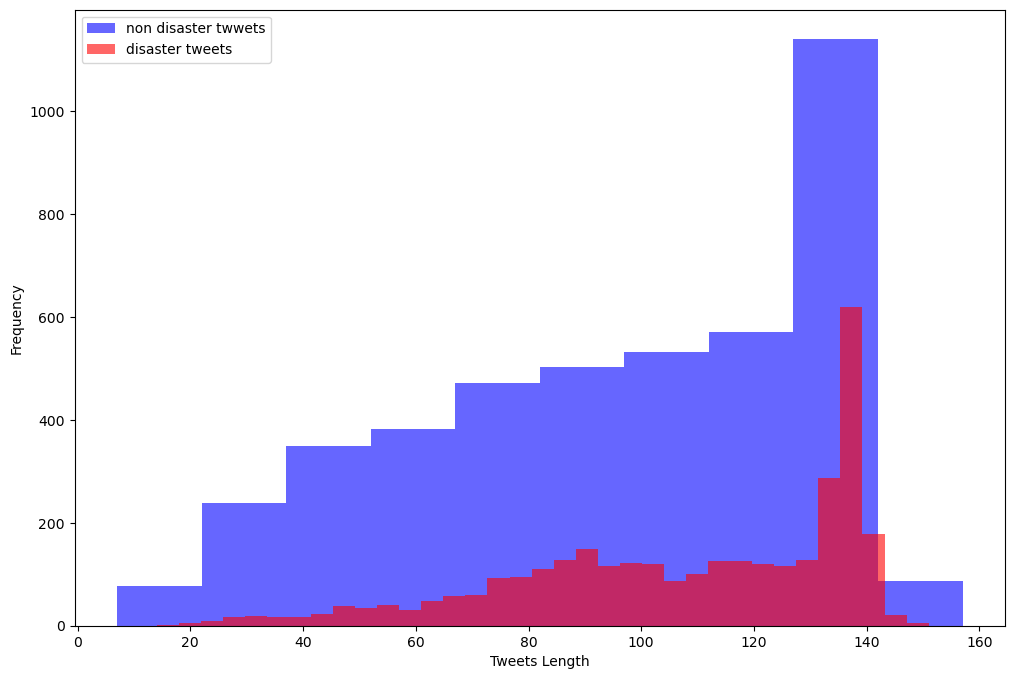

In [65]:
plt.figure(figsize=(12, 8))


train[train.target==0].tweet_len.plot(kind='hist', color='blue', 
                                       label='non disaster twwets', alpha=0.6)

train[train.target==1].tweet_len.plot(bins=35, kind='hist', color='red', 
                                       label='disaster tweets', alpha=0.6)


plt.legend()
plt.xlabel("Tweets Length")

In [80]:
# Lets do pre-processing on comments
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]',' ', text)
    text = text.lower()
    text = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word not in set(stopwords.words('english'))]
    clean_text = ' '.join(text)
    return clean_text
   

In [81]:
# Comment before preprocessing
train['text'].iloc[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [84]:
# Comment after preprocessing
preprocess_text(train['text'].iloc[2])

'resident asked shelter place notified officer evacuation shelter place order expected'

In [85]:
# Creating vectors for train and test data using tf-idf with the custom tokenizer that we defined earlier
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(tokenizer = preprocess_comment, max_features=10000,ngram_range=(1, 3),max_df=0.7)
X_train = cv.fit_transform(train)
X_test = cv.transform(test)

In [88]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 6.7 MB/s eta 0:00:00


In [89]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle


In [98]:
from sklearn.model_selection import train_test_split

In [102]:
X = np.array(train.text)
y = np.array(train.target)

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.20)

In [104]:
df=pd.concat([train,test])
df.shape

(10876, 7)

### Removing urls


In [105]:
example="New example launched :https://www.mazen.com/c/nlp-getting-started"

In [106]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New example launched :'

In [107]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [108]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(example))

New example launched :https://www.mazen.com/c/nlp-getting-started


In [109]:
df['text']=df['text'].apply(lambda x : remove_html(x))

### Removing Emojis

In [110]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [111]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

### Removing punctuations


In [112]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [113]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

### Real Disaster


In [115]:
def create_corpus_df(train, target):
    corpus=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [116]:
corpus_new1=create_corpus_df(df,1)
len(corpus_new1)

46145

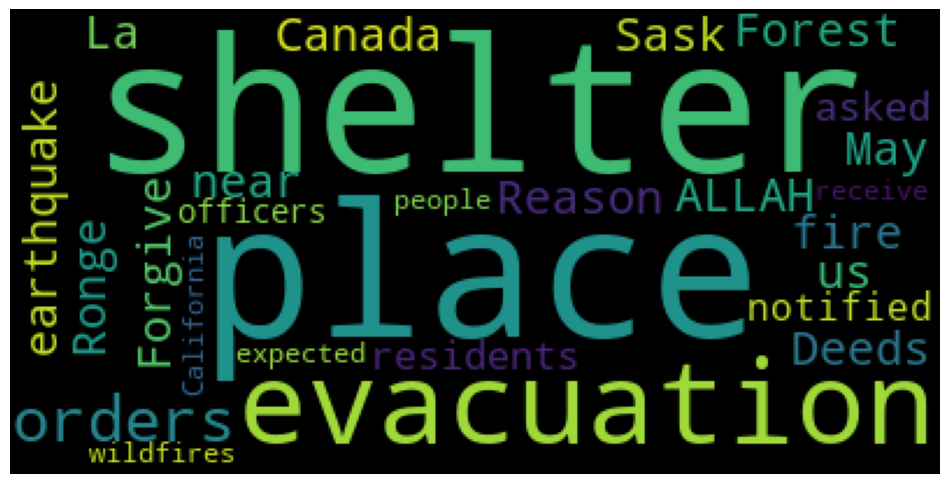

In [117]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Not a disaster

In [118]:
corpus_new0=create_corpus_df(df,0)
len(corpus_new0)

60602

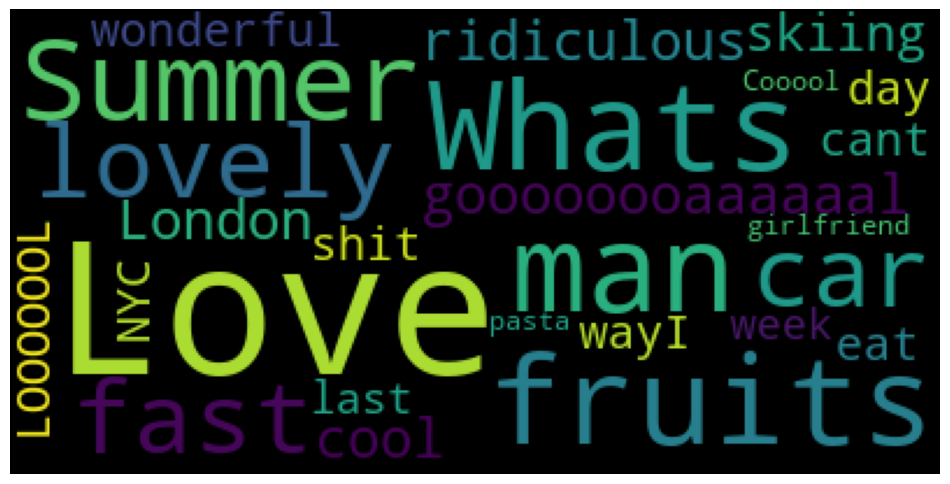

In [119]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new0[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [123]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["text"].tolist()
list_labels = df["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                shuffle = True)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

### Visualizing the embeddings


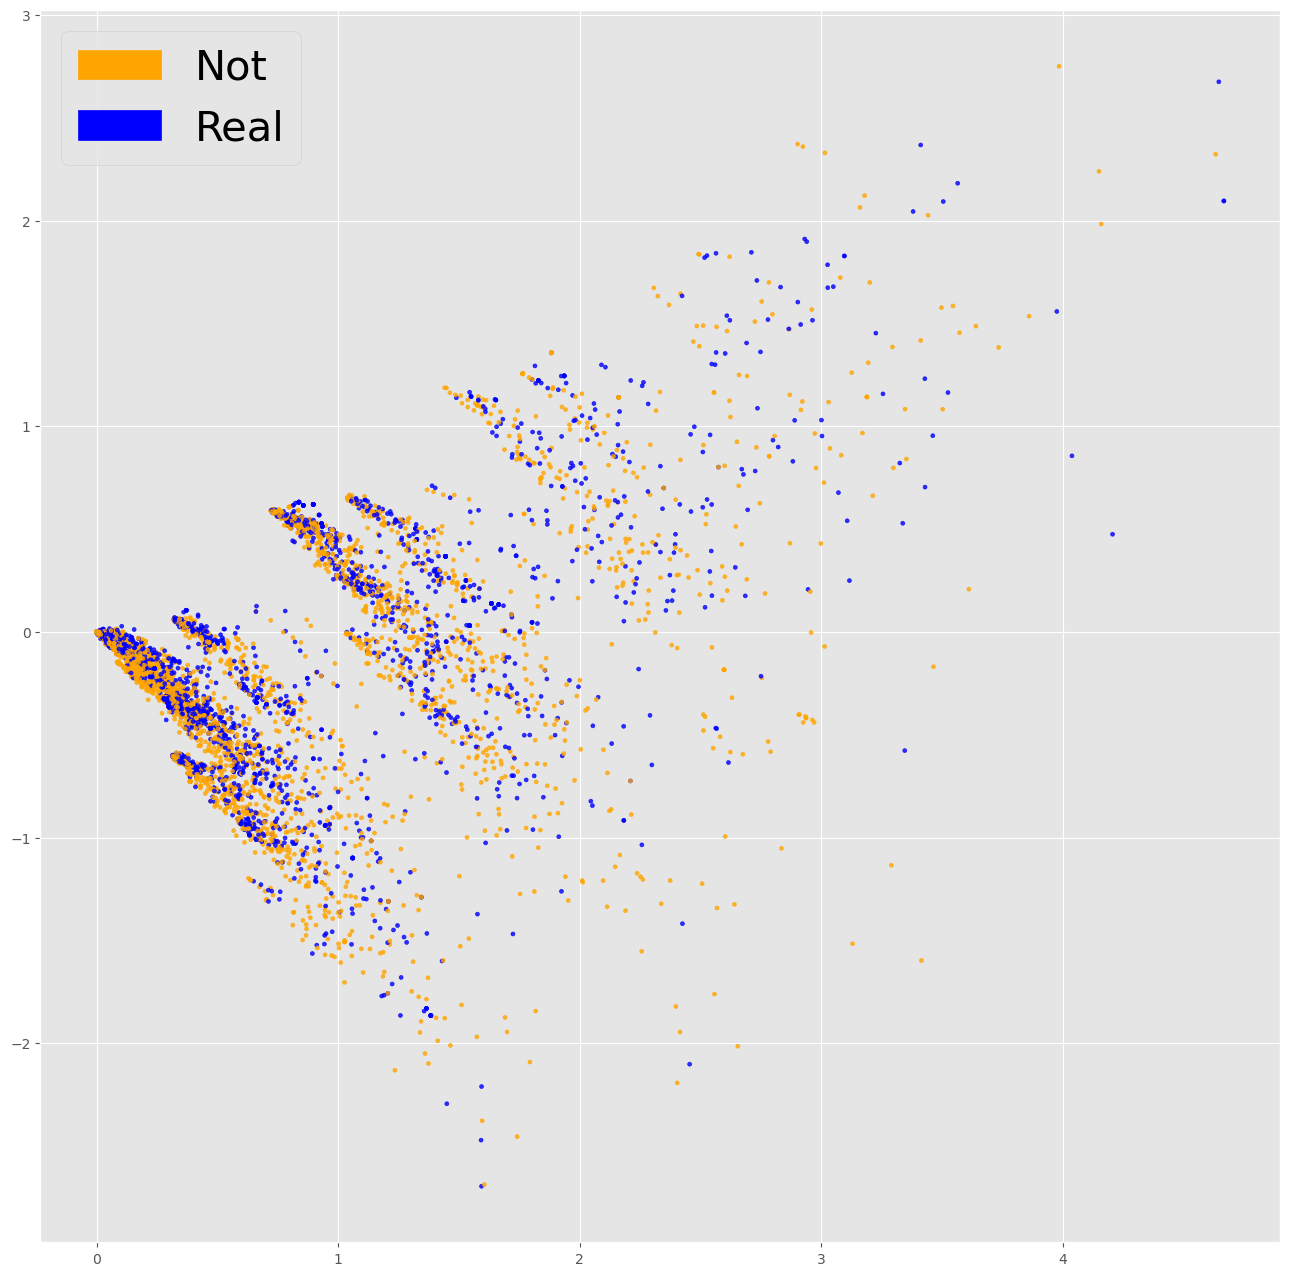

In [126]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

### TF IDF

In [127]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

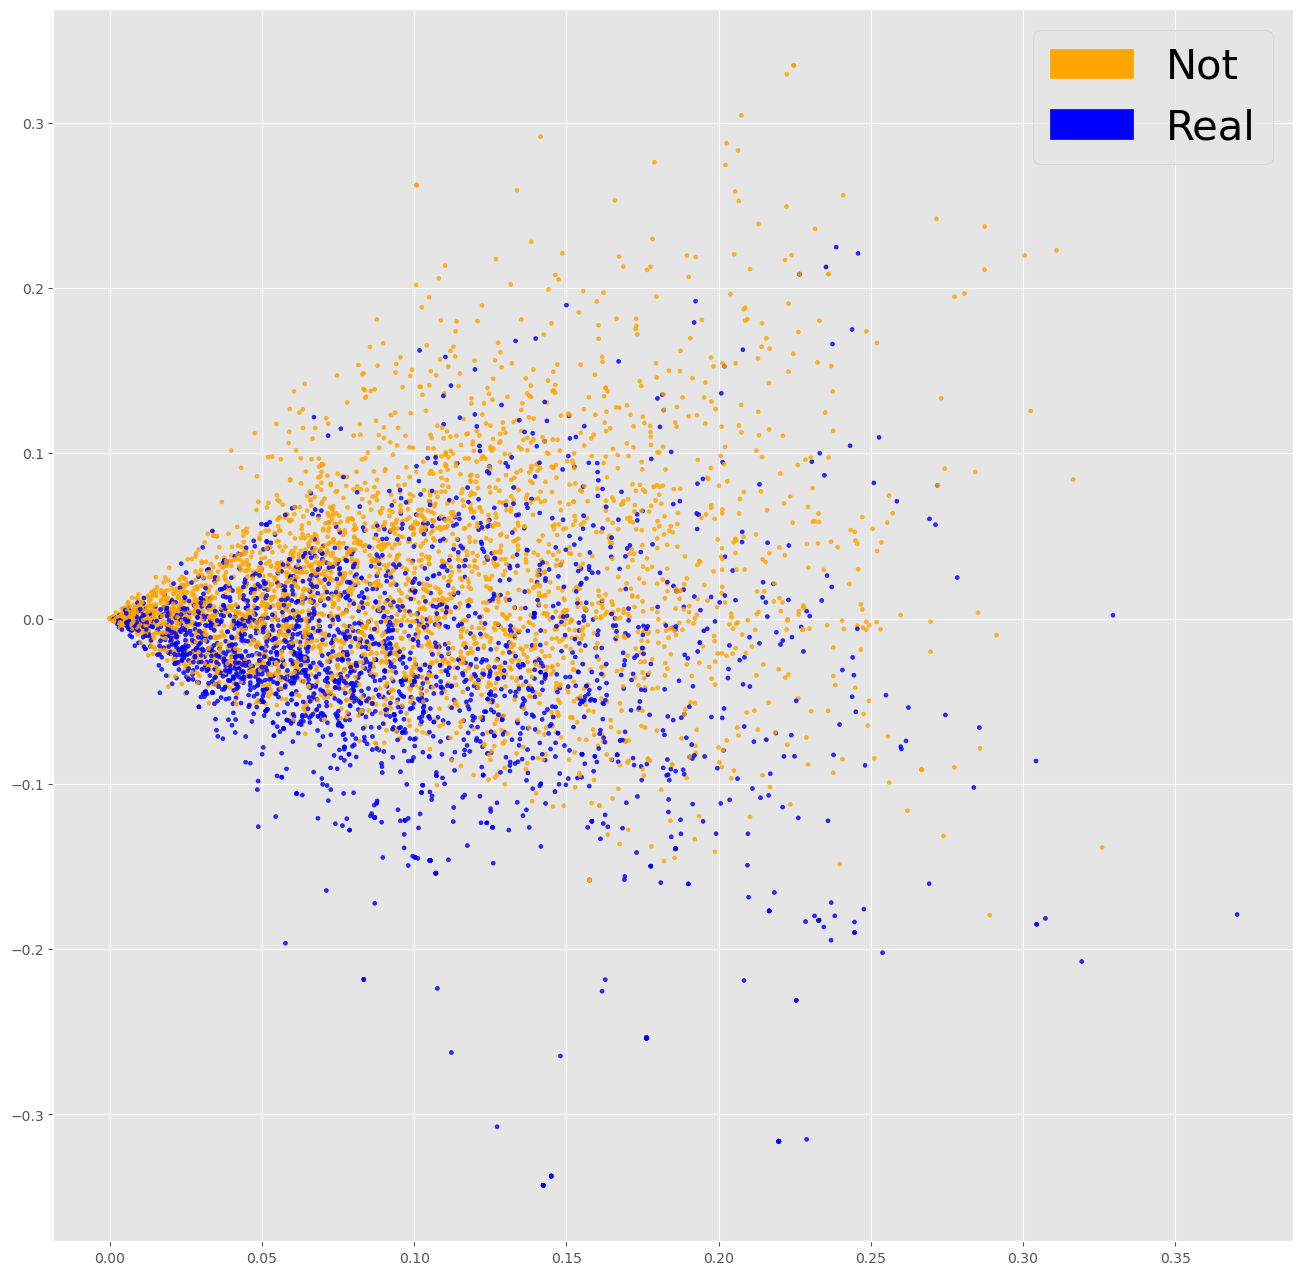

In [128]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()